<div class="alert alert-block alert-info">
    <h1>Natural Language Processing</h1>
    <h3>General Information:</h3>
    <p>Please do not add or delete any cells. Answers belong into the corresponding cells (below the question). If a function is given (either as a signature or a full function), you should not change the name, arguments or return value of the function.<br><br> If you encounter empty cells underneath the answer that can not be edited, please ignore them, they are for testing purposes.<br><br>When editing an assignment there can be the case that there are variables in the kernel. To make sure your assignment works, please restart the kernel and run all cells before submitting (e.g. via <i>Kernel -> Restart & Run All</i>).</p>
    <p>Code cells where you are supposed to give your answer often include the line  ```raise NotImplementedError```. This makes it easier to automatically grade answers. If you edit the cell please outcomment or delete this line.</p>
    <h3>Submission:</h3>
    <p>Please submit your notebook via the web interface (in the main view -> Assignments -> Submit). The assignments are due on <b>Wednesday at 15:00</b>. If this does not work there is a submission slot on LEA.</p>
    <h3>Group Work:</h3>
    <p>You are allowed to work in groups of up to three people. Please enter the UID (your username here) of each member of the group into the next cell. We apply plagiarism checking, so do not submit solutions from other people except your team members. If an assignment has a copied solution, the task will be graded with 0 points for all people with the same solution.</p>
    <h3>Questions about the Assignment:</h3>
    <p>If you have questions about the assignment please post them in the LEA forum before the deadline. Don't wait until the last day to post questions.</p>
    
</div>

In [1]:
'''
Group Work:
Enter the UID (LEA username) of each team member into the variables. 
If you work alone please fill the first variable only.
'''
member1 = 'dpadma2s'
member2 = 'smuthi2s'
member3 = 'vmoham2s'

# What you need

For this assignment we will use ```SpaCy```. This module helps us in processing text and has many features.
We want to use it for tokenizing text. For this you need a language model. If the language model is not installed please execute ```!python -m spacy download en``` in a cell. Then reload ```spacy``` and try loading the model with ```spacy.load('en_core_web_sm')```.

# Word Embeddings

For training word embeddings we will use the ```gensim``` package.

We can choose ```Word2Vec``` or ```FastText``` from ```gensim.models```.

To train a model you give a corpus as a list of sentences which are in turn lists of tokens.

*Example:*

```
sentences = gutenberg.sents('austen-emma.txt')
model = Word2Vec(sentences, size=100, window=5, min_count=1)
```
This will train a model with vectors of ```size=100```, using a context window (n-gram) of size ```window=5``` and taking into account words that appear at least ```min_count=1``` times in our corpus.

# Extracting Information from Wikipedia

A great source for structured text is Wikipedia. To access the content of it via Python I wrote a little helper class on top of the wikipedia-api package.

It has two methods, one gives you the name of all pages under a category (up to a depth of ```max_level```).

The other method gives you the tokenized content of a page you specify by name.

In [2]:
import wikipediaapi
import spacy

class WikiExtractor:
    
    def __init__(self):
        self.wiki = wikipediaapi.Wikipedia(language='en')
        self.nlp = spacy.load('en_core_web_sm', disable=['tagger', 'ner', 'parser'])
        self.nlp.add_pipe(self.nlp.create_pipe('sentencizer'))
        
    def pages_in_category(self, category, level=0, max_level=1):
        if type(category) == str:
            if not category.startswith('Category:'):
                category = 'Category:' + category
            category = self.wiki.page(category)
        pages = []
        if level >= max_level:
            return pages
        for c in category.categorymembers.values():
            if c.ns == wikipediaapi.Namespace.CATEGORY:
                pages.extend(self.pages_in_category(c, level + 1, max_level))
            else:
                pages.append(c.title)
        return pages
    
    def extract_from_page_name(self, page_name):
        doc = self.nlp(self.wiki.page(page_name).text)
        parsed = []
        for sent in doc.sents:
            parsed.append([str(t) for t in sent])
        return parsed

## 1. Create a Corpus [15 Points]

We want to create a corpus from the Wikipedia category ```Natural Language Processing```. For this we want all pages in this category and all sub-categories up to a depth of 3 (this should be 794 pages).

### 1.1 Save the names of the pages in a variable called ```pages```. Use the WikiExtractor to get the page names. [5 Points]

In [3]:
pages = []
SEARCH_PAGE = 'Natural language processing'
extractor = WikiExtractor()
pages = extractor.pages_in_category(SEARCH_PAGE, level = 0, max_level=3)
print('The number of pages related to \'{}\' is: {}'. format(SEARCH_PAGE, len(pages)))
print('The first 3 pages from the category are:\n {}'.format(pages[:3]))
print('The last  3 pages from the category are:\n {}'.format(pages[-3:]))


The number of pages related to 'Natural language processing' is: 794
The first 3 pages from the category are:
 ['MeCab', 'W-shingling', 'Affix grammar over a finite lattice']
The last  3 pages from the category are:
 ['Phrase structure grammar', 'Calais (Reuters product)', 'Filtered-popping recursive transition network']


In [4]:
# This is a test cell, please ignore it!

### 1.2 Tokenize the pages using the WikiExtractor [7 Points]

Save the tokenized pages in a variable called ```corpus```. This should contain a list of sentences (which are lists of tokens) for all the articles from the category. This might take a few minutes depending on the response time of Wikipedia.

In [5]:
%%time
corpus = []

for page_name in pages:
    corpus.extend(extractor.extract_from_page_name(page_name))

print('The first sentence in our corpus is:\n{}'.format(corpus[0]))
print('The last  sentence in our corpus is:\n{}'.format(corpus[-1]))

The first sentence in our corpus is:
['MeCab', 'is', 'an', 'open', '-', 'source', 'text', 'segmentation', 'library', 'for', 'use', 'with', 'text', 'written', 'in', 'the', 'Japanese', 'language', 'originally', 'developed', 'by', 'the', 'Nara', 'Institute', 'of', 'Science', 'and', 'Technology', 'and', 'currently', 'maintained', 'by', 'Taku', 'Kudou', '(', '工藤拓', ')', 'as', 'part', 'of', 'his', 'work', 'on', 'the', 'Google', 'Japanese', 'Input', 'project', '.']
The last  sentence in our corpus is:
['\n\n\n', '=', '=', 'References', '=', '=']
CPU times: user 24.8 s, sys: 169 ms, total: 25 s
Wall time: 6min 5s


### 1.3 Save your corpus [3 Points]

Since we don't want to extract the corpus again everytime we run this notebook, we would like to save our corpus to a file. For this we can use the built-in Python module ```pickle```. Save your file as ```corpus.pkl```.

*Example:*

Saving data:

```
import pickle

some_data = [...]
with open('my_file.pkl', 'wb') as f:
    f.write(pickle.dumps(some_data)
```

Loading data:

```
import pickle

with open('my_file.pkl', 'rb') as f:
    some_data = pickle.loads(f.read())
```

In [28]:
import pickle

with open('my_file.pkl', 'wb') as f:
    f.write(pickle.dumps(corpus))

In [29]:
# This is a test cell, please ignore it!

## 2. Word2Vec [10 Points]
### 2.1 Training a Word2Vec model [7 Points]

In the first task you should train a model on your corpus. Load your corpus from the pickled file ```corpus.pkl```.

Create a Word2Vec model with vectors of size 60, with a window size of 5 and a min count of 3.

Store this in the variable ```model_w2v```.

In [30]:
from gensim.models import Word2Vec
import pickle

with open('my_file.pkl', 'rb') as f:
    corpus = pickle.loads(f.read())
    
for i in range(0,len(corpus)):
    corpus[i]=tuple(corpus[i])
    
model_w2v = Word2Vec(corpus, size=60, window=5, min_count=3)


In [31]:
# This is a test cell, please ignore it!

### 2.2 Saving your model [3 Points]

To save and load a model we can use ```gensim```. We can just call ```model.save('mymodel.model')```.

Save your model in the file ```model_w2v.model```.

To load your file again you can ```Word2Vec.load('mymodel.model')```.

In [32]:
model_w2v.save('mymodel.model')
model = Word2Vec.load('mymodel.model')

/media/deepan/externaldrive2/anaconda/envs/study/lib/python3.5/site-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [33]:
# This is a test cell, please ignore it!

## 3. Using the model [20 Points]

### 3.1 Finding the most similar words to a given word [7 Points]

We now want to find the most similar words to a given word.

For this we need to access the KeyedVectors of the model via ```model.wv.most_similar('word')```.

You are given the words ```['natural', 'language', 'processing', 'is', 'fun', 'ELIZA']```.

For each word store the result in the list ```most_similar_words```.

This should contain an entry for each input word as a tuple ```(input_word, most_similar_word, similarity)```.

An example for an entry would be ```('POS', 'tagging', 0.9154)```. This means the most similar word to ```POS``` is ```tagging``` with a similarity of ```0.9154```.

In [34]:
input_words = ['natural', 'language', 'processing', 'is', 'interesting', 'ELIZA', 'POS']
most_similar_words = []

for i in input_words:
    store = (i,) + model.wv.most_similar(i)[0]
    most_similar_words.append(store)

for entry in most_similar_words:
    print('The most similar word to "{}" is "{}" with a similarity of {:.4f}'.format(*entry))

The most similar word to "natural" is "processing" with a similarity of 0.9189
The most similar word to "language" is "understanding" with a similarity of 0.7003
The most similar word to "processing" is "natural" with a similarity of 0.9189
The most similar word to "is" is "renders" with a similarity of 0.6836
The most similar word to "interesting" is "cd+wc" with a similarity of 0.9474
The most similar word to "ELIZA" is "reCAPTCHA" with a similarity of 0.9477
The most similar word to "POS" is "tagger" with a similarity of 0.9221


In [13]:
# This is a test cell, please ignore it!

### 3.2 Finding out the most similar word to a list of given words [7 Points]

Instead of just finding the most similar word to a single word, we can also find the most similar word to a bunch of words at the same time.

This can be done by calling ```most_similar(positive=[word1, word2, ...])```.

Do this for the following input: 
```
[('natural', 'language'), 
 ('natural', 'understanding'), 
 ('sentence', 'tokenization'),
 ('chatbot', 'ELIZA'),
 ('dependency', 'parsing'),
 ('POS', 'tagging'),
 ('probability', 'theory')]
```

This means for the first one you need to find the most similar word to ```('natural', 'language')```.

Store your result in the list ```most_similar_positive_word```, again in the same format as for the previous task. 


Each entry should look like this:

```(('probability', 'theory'), 'concept', 0.8886)``` saying the most similar word to ```('probability', 'theory')``` is ```concept```.

In [14]:
input_words = [
    ('natural', 'language'), 
    ('natural', 'understanding'), 
    ('sentence', 'tokenization'),
    ('chatbot', 'ELIZA'),
    ('dependency', 'parsing'),
    ('POS', 'tagging'),
    ('probability', 'theory')]
most_similar_positive_word = []
for i in input_words:
    word = model.wv.most_similar(positive=list(i))[0]
    most_similar_positive_word.append(tuple([i,word[0], word[1]] ))

for entry in most_similar_positive_word:
    print('The most similar word to the words {} is "{}" with a similarity of {:.4f}'.format(*entry))

The most similar word to the words ('natural', 'language') is "processing" with a similarity of 0.8999
The most similar word to the words ('natural', 'understanding') is "processing" with a similarity of 0.9375
The most similar word to the words ('sentence', 'tokenization') is "lemma" with a similarity of 0.9154
The most similar word to the words ('chatbot', 'ELIZA') is "belief" with a similarity of 0.9319
The most similar word to the words ('dependency', 'parsing') is "lexical" with a similarity of 0.9385
The most similar word to the words ('POS', 'tagging') is "tagger" with a similarity of 0.8957
The most similar word to the words ('probability', 'theory') is "derivation" with a similarity of 0.9167


In [15]:
# This is a test cell, please ignore it!

### 3.3 Finding out what does not match [6 Points]

We can provide our model with a list of tokens (words) and find out which one does not match using ```my_model.wv.doesnt_match([word1, word2, ...])```

You are given the following list, where each sublist refers to a set of words where we want to find out what does not match.

```
input_words = [['sentiment', 'gram', 'bigram', 'trigram'],
               ['named', 'entity', 'detection', 'recognition'], 
               ['verb', 'noun', 'phrase', 'extraction'],
               ['dependency', 'tagging', 'POS', 'speech'],
               ['stemming', 'tagging', 'lemmatizing', 'trigram']]
```

For each sublist, create an entry in the list ```does_not_match``` that holds the word that does not match. 

In [16]:
input_words = [['sentiment', 'gram', 'bigram', 'trigram'],
               ['named', 'entity', 'detection', 'recognition'], 
               ['verb', 'noun', 'phrase', 'extraction'],
               ['dependency', 'tagging', 'POS', 'speech'],
               ['stemming', 'tagging', 'lemmatizing', 'trigram']]

does_not_match = []
for i in input_words:
    does_not_match.append(model.wv.doesnt_match(i))

for odd_one, sublist in zip(does_not_match, input_words):
    print('From the list {}, the word "{}" does not match!'.format(sublist, odd_one))

From the list ['sentiment', 'gram', 'bigram', 'trigram'], the word "sentiment" does not match!
From the list ['named', 'entity', 'detection', 'recognition'], the word "detection" does not match!
From the list ['verb', 'noun', 'phrase', 'extraction'], the word "extraction" does not match!
From the list ['dependency', 'tagging', 'POS', 'speech'], the word "dependency" does not match!
From the list ['stemming', 'tagging', 'lemmatizing', 'trigram'], the word "trigram" does not match!


In [17]:
# This is a test cell, please ignore it!

## 4. Similarity between documents [19 Points]

Word2Vec tells us how similar words are. But often we are interested in how similar documents or sentences are.

### 4.1 SOWE [11 Points]

There is a naive way of doing this by summing up the vectors of each document and calculating the cosine similarity between those. This is called sum of word embeddings (SOWE).

The vector of a word can be accessed via ```model.wv[word]```.

Complete the function below.

In [18]:
import numpy as np
from collections import Counter


def SOWE(model: Word2Vec, doc1: [str], doc2: [str]) -> float:
    '''
    Calculate the SOWE similarity between two documents
    
    Arguments:
        model -- a word embedding model
        doc1  -- the first document as a list of tokens ['This', 'is', 'a', 'document']
        doc2  -- the second document as a list of tokens ['This', 'is', 'a', 'document']
    Returns:
        sim   -- the cosine similarity between the two documents
    '''
    vector1 = []
    vector2 = []
    for i in doc1:
        vector1.append(model.wv[i])
    for i in doc2:
        vector2.append(model.wv[i])
    
    vector1_sum = np.sum(np.array(vector1), axis=0)
    vector2_sum = np.sum(np.array(vector2), axis=0)
    
    
    sim = np.dot(vector1_sum, vector2_sum)/(np.linalg.norm(vector1_sum)*np.linalg.norm(vector2_sum))

    return sim
        
        
    
model_w2v = model    
SOWE(model_w2v, ['part', 'of', 'speech', 'tagging', 'is', 'interesting'], 
                ['dependency', 'parsing', 'is', 'interesting', 'too'])


0.76304674

In [19]:
# This is a test cell, please ignore it!

## 4.2 Finding the most similar document [8 Points]

You are given a list of documents ```docs```. And a document ```target_doc```.

Create a list ```similarity``` that holds an entry for each document and the similarity to the target document.

Sort this list by the similarity in descending order.

In [20]:
docs = [
    ['people', 'say', 'POS', 'tagging', 'is', 'useful'],
    ['some', 'claim', 'dependency', 'parsing', 'is', 'fun'],
    ['sentiment', 'analysis', 'is', 'not', 'easy'], 
    ['ELIZA', 'was', 'a', 'chatbot'],
    ['trigrams', 'are', 'similar', 'to', 'bigrams']
]

target_doc = ['Natural', 'language', 'understanding', 'is', 'hard']
similarity = []

for i in docs:
    sim_value = (SOWE(model_w2v, target_doc, i))
    similarity.append([i, sim_value])

similarity = sorted(similarity,key=lambda l:l[1], reverse=True)

for entry in similarity:
    print('The sentence "{}" is {:.2f} similar to the target.'.format(
        ' '.join(entry[0]),
        entry[1]
    ))

The sentence "people say POS tagging is useful" is 0.76 similar to the target.
The sentence "some claim dependency parsing is fun" is 0.74 similar to the target.
The sentence "sentiment analysis is not easy" is 0.69 similar to the target.
The sentence "trigrams are similar to bigrams" is 0.49 similar to the target.
The sentence "ELIZA was a chatbot" is 0.46 similar to the target.


In [21]:
# This is a test cell, please ignore it!

## 5. Insights on how to choose training parameters [36 Points]

When training a model it is important to choose a good vector size. If they are too small you will not encode enough information, if they are too big you waste memory.

One way to get an estimate for how to choose the size is to start with a certain size and then apply PCA (principal component analysis) to the vectors. PCA is used for dimensionality reduction. You can give it vectors of a certain size and map them to smaller vectors. PCA gives us the mapping between the high and the low dimensional vectors. PCA also tells us how much variance of the original data is encoded in each component.

We will use the implementation from [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to do this.

### 5.1.1 Finding out how much variance is encoded in each dimension [6 Points]

To access all the vectors from your word embedding model, you can call ```model_w2v.wv.vectors```.

Perform PCA on this with ```n_components=60```. Store the explained variance ratio in the variable ```variance```.

*Hint: If you have trouble doing this, look at the examples in the scikit-learn docs*

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=60, svd_solver='full')
pca.fit(model_w2v.wv.vectors)
variance = pca.explained_variance_ratio_

print('Printing the information about the first 3 components.')
for i in range(3):
    print('Component number {} encodes {:.2f} percent of the variance.'.format(i + 1, variance[i]))

Printing the information about the first 3 components.
Component number 1 encodes 0.25 percent of the variance.
Component number 2 encodes 0.21 percent of the variance.
Component number 3 encodes 0.15 percent of the variance.


In [23]:
# This is a test cell, please ignore it!

### 5.1.2 Visualization [6 Points]

Create a bar chart from the variance. The x-axis denotes the number of the component (starting at 0) and the y-axis the amount of variance encoded.

As always, make sure your plot has labels, a legend, a title and a grid.

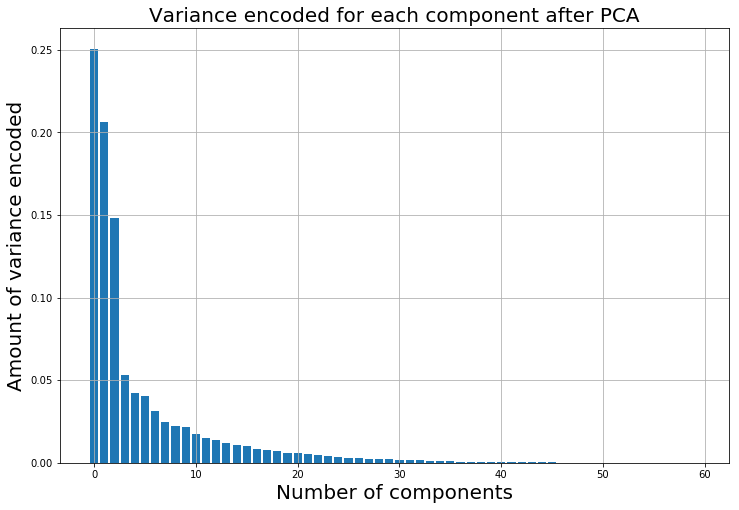

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
x = range(len(variance))
plt.bar(x, variance)
plt.ylabel('Amount of variance encoded', fontdict={'size':20})
plt.xlabel('Number of components', fontdict={'size':20})
plt.title('Variance encoded for each component after PCA', fontdict={'size':20})
plt.grid()
plt.show()

### 5.1.3 Visualization of accumulated variance [6 Points]

Now we want to find out how many components we actually need to encode 99% of the variance of the original data.

For this we will first create a plot of the accumulated variance. Store this variance in the variable ```accumulated_variance```. The first entry should tell us how much variance the first component stores, the second entry should tell us the variance of the first and second compononent summed together and so on.

Plot this as a bar chart.

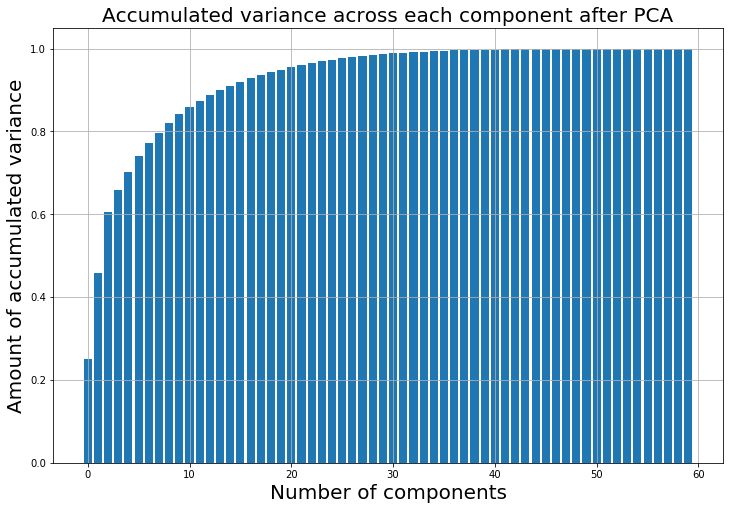

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
accumulated_variance = []

for n, i in enumerate(variance):
    accumulated_variance.append(sum(variance[:n+1]))

x = range(len(accumulated_variance))
plt.bar(x, accumulated_variance)
plt.ylabel('Amount of accumulated variance', fontdict={'size':20})
plt.xlabel('Number of components', fontdict={'size':20})
plt.title('Accumulated variance across each component after PCA', fontdict={'size':20})
plt.grid()
plt.show()

### 5.1.4 Finding out a good estimate for the vector size for training our model [6 Points]

Find out how many components are needed to encode ```99.9%``` of the variance of the original data.

Store this in the variable ```n_components```.

In [26]:
n_components = 0

idx_ = np.where(np.array(accumulated_variance)>0.999)[0]
n_components = min(idx_) + 1 # Because component 1 is at 0 idx.
        
print('We need {} components to encode 99% of the variance'.format(n_components))

We need 46 components to encode 99% of the variance


In [27]:
# This is a test cell, please ignore it!

### 5.2.1 Window size [6 Points]

Please write down your understanding of how the window size affects the trained vectors. 

Larger windows tend to capture more topic/domain information.  Smaller windows tend to capture more about word itself.

For example "Earth is one of planets of the solar system" if the window size is 2 then the vector of word "Earth" is directly affected by the word "is" and "one" (assuming no word is a stop word), if the window size is 5 "Earth" can be directly affected by the "planet". The 'affected' here means it will pull the vector of two words closer, similarity is more. So it depends on the material used for training, if the window size of 2 can capture the context of a word, but 5 is chosen, it will decrease the quality of the learnt model, and vise versa.

### 5.3.1 Min count [6 Points]

Why would you want to exclude words that appear less than a certain number of times in the corpus?

Min count/cutoff removes from the language model those n-grams that occur infrequently in the training data. Reducing the size of n-gram language models is sometimes necessary, as the number of even bigrams (also for trigrams, 4-grams, etc.) explodes for larger corpora. The remaning information (n-gram counts) can then be used to statistically better estimate the probability of a word given the (n-1) previous words. Removing infrequent words provides more compact vector representation, association between words can be represented well for the remaining words.

